<a href="https://colab.research.google.com/github/Bandi-Lavanya/ML_tasks/blob/main/ML_Task(Day12_13).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/realest.csv")

In [ ]:
data.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [ ]:
print("missing values are")
print(data.isnull().sum())

missing values are
Price         1
Bedroom       1
Space        11
Room          1
Lot          11
Tax          10
Bathroom      1
Garage        1
Condition     1
dtype: int64


In [ ]:
data.dropna(inplace=True)

In [ ]:
X = data.drop(columns=['Price'])  # Features (independent variables)
y = data['Price']  # Target variable (house price)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

**StandardScaler()** is a preprocessing technique in scikit-learn that standardizes numerical features by removing the mean and scaling to unit variance.

 **Ensures all features are on the same scale**

Example:
Tax = 1099, Bedroom = 3, Garage = 1.5

If we don’t scale, Tax will dominate model learning.
After StandardScaler(), all features have mean = 0 and variance = 1.

In [ ]:
house_price_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale all numerical features
    ('model', LinearRegression())  # Train Linear Regression model
])

In [ ]:
house_price_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [ ]:
y_pred = house_price_pipeline.predict(X_test)

In [ ]:
print(y_pred)

[56.42808679 57.12330882 57.85028937 57.13531467 53.87064313 59.20220875
 53.63732473 58.95794675 56.51487373 50.34256363 60.41462287 78.12098639
 53.55348102 49.88111204 55.96428985 43.86858865 47.30182784 48.96651152
 48.02865468 54.21309326 64.70691408 61.87711014 76.257133   78.62769443
 41.89325294 53.8753321 ]


In [ ]:
#The lower the MSE, the better the model's predictions.
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 68.50


In [ ]:
y_actual = [53, 55, 56, 58, 64]   # Actual house prices
y_predicted = [50, 54, 57, 60, 63] # Predicted house prices
plt.figure(figsize=(8, 5))
plt.scatter(y_actual, y_predicted, color='blue', label="Predictions")
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)],
         linestyle='--', color='red', label="Perfect Fit Line")

# Labels
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.legend()
plt.show()

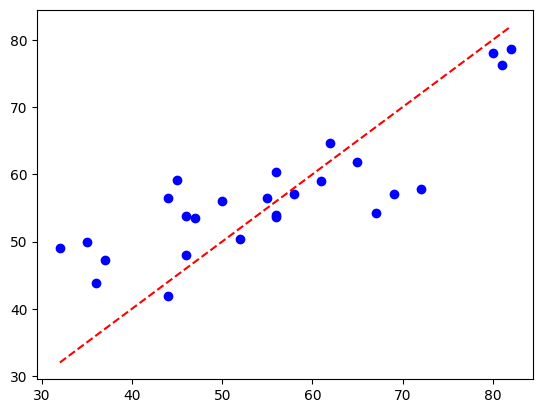

In [ ]:
plt.scatter(y_test, y_pred, color='blue', label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
         linestyle='--', color='red', label="Perfect Fit Line")
